In [1]:
import sys
import os

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
from tqdm import tqdm_notebook

In [2]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?:')

1.크롤링할 키워드는 무엇입니까?:여행수단


In [3]:
path = '../driver/chromedriver.exe'
driver = webdriver.Chrome(path)
driver.get('http://naver.com')
time.sleep(2)

element=driver.find_element_by_id("query")
element.send_keys(query_txt)
element.submit()

driver.find_element_by_link_text("VIEW").click()
time.sleep(1)

driver.find_element_by_link_text("블로그").click()
time.sleep(1)

driver.find_element_by_link_text("옵션").click()
time.sleep(1)

driver.find_element_by_link_text("직접입력옵션펼치기").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2914185354.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2914185354.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  element=driver.find_element_by_id("query")
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2914185354.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("VIEW").click()
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2914185354.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("블로그").click()
C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2914185354.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  dri

In [4]:
driver.find_element_by_link_text("2018").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/4291389599.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("2018").click()


In [5]:
driver.find_element_by_link_text("2").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/1606609489.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("2").click()


In [6]:
driver.find_element_by_link_text("1").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/1856955342.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("1").click()


In [7]:
driver.find_element_by_link_text("2020").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/2764847192.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("2020").click()


In [8]:
driver.find_element_by_link_text("1").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/1856955342.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("1").click()


In [9]:
driver.find_element_by_link_text("31").click()
time.sleep(1)

C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/3502739528.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_link_text("31").click()


In [10]:
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0, 99999999)")
    time.sleep(1)

# n: 스크롤할 횟수 설정
n = 50
i = 0
while i < n:
    scroll_down(driver)
    i = i+1

In [11]:
# 블로그 글 url들 수집
url_list = []
title_list = []

# URL_raw 크롤링 시작
article_raw = driver.find_elements_by_css_selector(".api_txt_lines.total_tit")
article_raw[0]

# 크롤링한 url 정제 시작
for article in article_raw:
    url = article.get_attribute('href')   
    url_list.append(url)

time.sleep(1)
    
# 제목 크롤링 시작    
for article in article_raw:
    title = article.text
    title_list.append(title)


C:\Users\dlfrl\AppData\Local\Temp/ipykernel_22100/3414791471.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  article_raw = driver.find_elements_by_css_selector(".api_txt_lines.total_tit")


In [13]:
df = pd.DataFrame({'url':url_list, 'title':title_list})
df

,url,title
0,https://blog.naver.com/obonparis?Redirect=Log&...,파리 여행 : 파업 대비 대중교통 대체수단 알고 가기 / 버스...
1,https://blog.naver.com/bbomiss?Redirect=Log&lo...,방콕 자유여행 교통수단 - 방콕택시 그리고 툭툭이(Tuk Tuk)
2,https://blog.naver.com/missymom582?Redirect=Lo...,멜버른 여행에서 시드니로 이동할 때 이동 수단은 뭐가 좋을까요?
3,https://blog.naver.com/jinmichu?Redirect=Log&l...,뉴욕 여행 교통수단 메트로카드 7일권 필수템 ♩
4,https://blog.naver.com/ironmask0728?Redirect=L...,쿠알라룸푸르 자유여행/ 여행시 꼭 알아야할 교통수단 완벽 분석!
...,...,...
1045,https://blog.naver.com/tongyeokgi?Redirect=Log...,북미유학가기 전에 중국여행추천 #중국장거리교통수단...
1046,https://blog.naver.com/mju0508?Redirect=Log&lo...,베네치아 교통수단 {부라노섬 들어가기}
1047,https://blog.naver.com/uni7741?Redirect=Log&lo...,"후아힌 썽태우, 택시보다 저렴한 교통수단:이용방법, 노선도 후기"
1048,https://blog.naver.com/queen77577?Redirect=Log...,파리에서 니스 가는법/ 교통수단. 기차 파업?


In [14]:
# url_list 저장
df.to_excel("20180201-20200131여행수단naver_blog.xlsx")

In [15]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [16]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager,rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

%matplotlib inline

In [17]:
text = open('../data/코로나전여행수단.txt', 'r', encoding='utf8').read()
stopwords = set(STOPWORDS)

In [18]:
text

'파리 여행 : 파업 대비 대중교통 대체수단 알고 가기 / 버스...\n방콕 자유여행 교통수단 - 방콕택시 그리고 툭툭이(Tuk Tuk)\n멜버른 여행에서 시드니로 이동할 때 이동 수단은 뭐가 좋을까요?\n뉴욕 여행 교통수단 메트로카드 7일권 필수템 ♩\n쿠알라룸푸르 자유여행/ 여행시 꼭 알아야할 교통수단 완벽 분석!\n미국여행필수 : 뉴욕여행 교통수단 우버보다 리프트(lyft)...\n싱가포르 여행 교통수단 정리 - 차량공유 그랩, 지하철...\n스위스4. 스위스 기차, 여행의 수단이 아닌 목적\n베트남 나트랑 자유여행 가서 현명하게 교통수단 이용하자\n스위스 천혜자연을 두루 여행할 수 있도록 도와주는 교통수단...\n쿠알라룸푸르 자유여행 이동수단 추천 그랩 grab 택시 사용방법\n싱가포르 자유여행 교통수단 그랩택시로 편리하게\n딸과 단둘이 마닐라여행 필리핀의 교통수단 지프니, 트라이시클\n2박3일 마쓰야마 여행 교통수단 "노면전차(IYOTETSU)"\n다낭 여행 교통 수단\n[유럽여행] 교통수단 가격 비교하기 - 부다페스트 비엔나 이동\n필리핀 세부 자유여행 이동수단, 그랩 (Grab) 택시 어플!\n필리핀여행 교통수단\n\'자율주행차+스위트룸\'..미래 여행 수단이 바뀐다\n[태국여행]교통수단 선택/태국여행계획/방콕 파타야\n비행기, 여행을 위한 수단인가? 탑승만으로도 여행인가?\n이탈리아 여행 필수 교통수단- 모바이크\n베트남 나트랑 여행 똑똑하게 교통수단 이용하기_ 나트랑 택시...\n아기랑싱가포르여행꿀팁_교통수단 : 택시보다 그랩(Grab)으로...\n[치앙라이 여행] 교통수단\n방콕 여행 교통수단 총정리 그랩 GRAB 사용방법 택시 타기\n태국여행 팁 : 치앙마이 교통수단 그랩 코드 정보 총정리\n말레이시아 여행) 쿠알라룸푸르 교통수단 그랩(Grab)...\n이집트에서 수단 비자 받기: 아프리카 수단여행 비자 발급 최신...\n중국, 대륙의 교통수단 ! 여행 시 교통수단 추천\n[꼬리에 꼬리를 무는 지식 여행 교통수단]교통수단의 시작은 용암!\n

In [19]:
import nltk

In [20]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(text) 
tokens_ko

C:\Users\dlfrl\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['파리',
 '여행',
 '파업',
 '대비',
 '대중교통',
 '대체',
 '수단',
 '알',
 '가기',
 '버스',
 '방콕',
 '자유여행',
 '교통',
 '수단',
 '방콕',
 '택시',
 '툭툭',
 '멜버른',
 '여행',
 '시드니',
 '이동',
 '때',
 '이동',
 '수단',
 '뭐',
 '뉴욕',
 '여행',
 '교통',
 '수단',
 '메트로',
 '카드',
 '필수',
 '템',
 '쿠알라룸푸르',
 '자유여행',
 '행시',
 '꼭',
 '알',
 '교통',
 '수단',
 '완벽',
 '분석',
 '미국여행',
 '필수',
 '뉴욕',
 '여행',
 '교통',
 '수단',
 '우버',
 '리프트',
 '싱가포르',
 '여행',
 '교통',
 '수단',
 '정리',
 '차량',
 '공유',
 '랩',
 '지하철',
 '스위스',
 '스위스',
 '기차',
 '여행',
 '수단',
 '목적',
 '베트남',
 '나트랑',
 '자유여행',
 '교통',
 '수단',
 '이용',
 '스위스',
 '혜자',
 '연',
 '두루',
 '여행',
 '수',
 '교통',
 '수단',
 '쿠알라룸푸르',
 '자유여행',
 '이동',
 '수단',
 '추천',
 '랩',
 '택시',
 '사용',
 '방법',
 '싱가포르',
 '자유여행',
 '교통',
 '수단',
 '랩',
 '택시',
 '딸',
 '단둘',
 '마닐라',
 '여행',
 '필리핀',
 '교통',
 '수단',
 '지프니',
 '트',
 '시',
 '박',
 '마쓰야마',
 '여행',
 '교통',
 '수단',
 '노면전차',
 '다낭',
 '여행',
 '교통',
 '수단',
 '유럽',
 '여행',
 '교통',
 '수단',
 '가격',
 '비교',
 '부다페스트',
 '비엔나',
 '이동',
 '필리핀',
 '세부',
 '자유여행',
 '이동',
 '수단',
 '랩',
 '택시',
 '어플',
 '필리핀',
 '여행',
 '교통',
 '수단',
 '자율',
 '행차',
 '스위트룸

In [21]:
from collections import Counter
tokens_counts = Counter(tokens_ko)
tokens_counts

Counter({'파리': 17,
         '여행': 824,
         '파업': 4,
         '대비': 1,
         '대중교통': 17,
         '대체': 2,
         '수단': 952,
         '알': 15,
         '가기': 5,
         '버스': 84,
         '방콕': 76,
         '자유여행': 113,
         '교통': 638,
         '택시': 78,
         '툭툭': 11,
         '멜버른': 1,
         '시드니': 4,
         '이동': 275,
         '때': 10,
         '뭐': 5,
         '뉴욕': 10,
         '메트로': 2,
         '카드': 9,
         '필수': 28,
         '템': 3,
         '쿠알라룸푸르': 6,
         '행시': 8,
         '꼭': 8,
         '완벽': 4,
         '분석': 1,
         '미국여행': 8,
         '우버': 12,
         '리프트': 1,
         '싱가포르': 14,
         '정리': 71,
         '차량': 6,
         '공유': 3,
         '랩': 57,
         '지하철': 28,
         '스위스': 16,
         '기차': 18,
         '목적': 4,
         '베트남': 42,
         '나트랑': 12,
         '이용': 86,
         '혜자': 1,
         '연': 2,
         '두루': 1,
         '수': 10,
         '추천': 39,
         '사용': 7,
         '방법': 38,
         '딸': 4,
  

In [22]:
#데이터정제하기
STOPWORDS = ['여행', '파리', '수단', '자유여행', '교통', '방콕', '이동', '필수', '꼭', '완벽', '이용', '두루', '추천', '방법', '필리핀', '박', '시', '트', '필리핀']

token_ko_selected = []
for token in tokens_ko:
    if token not in STOPWORDS:
        token_ko_selected.append(token)
        
token_counts_selected = Counter(token_ko_selected)
token_counts_selected.most_common(200)

[('유럽', 94),
 ('준비', 90),
 ('버스', 84),
 ('택시', 78),
 ('정리', 71),
 ('및', 71),
 ('태국', 69),
 ('랩', 57),
 ('예약', 54),
 ('일정', 44),
 ('베트남', 42),
 ('정보', 42),
 ('홍콩', 42),
 ('팁', 38),
 ('꿀팁', 37),
 ('편', 37),
 ('숙소', 35),
 ('경비', 33),
 ('발리', 33),
 ('루트', 33),
 ('코스', 32),
 ('공항', 32),
 ('다낭', 30),
 ('세부', 29),
 ('지하철', 28),
 ('미국', 28),
 ('후기', 27),
 ('도시', 27),
 ('제주도', 27),
 ('스페인', 25),
 ('이탈리아', 24),
 ('괌', 24),
 ('우도', 24),
 ('중국', 23),
 ('환전', 23),
 ('제주', 23),
 ('계획', 22),
 ('가족', 21),
 ('치앙마이', 20),
 ('방콕여행', 20),
 ('호텔', 20),
 ('등', 20),
 ('도쿄', 19),
 ('혼자', 19),
 ('대만', 19),
 ('기차', 18),
 ('꼬리', 18),
 ('일본', 18),
 ('유심', 18),
 ('대중교통', 17),
 ('동유럽', 17),
 ('인도', 17),
 ('세계', 17),
 ('해외여행', 17),
 ('스위스', 16),
 ('어플', 16),
 ('패스', 16),
 ('투어', 16),
 ('별', 16),
 ('알', 15),
 ('것', 15),
 ('싱가포르', 14),
 ('렌트', 14),
 ('남미', 14),
 ('하와이', 14),
 ('렌트카', 13),
 ('법', 13),
 ('날씨', 13),
 ('여자', 13),
 ('나', 13),
 ('영어', 13),
 ('우버', 12),
 ('나트랑', 12),
 ('비자', 12),
 ('시작', 12),
 ('런던', 12),
 (

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

font_path = "c:/Windows/Fonts/malgun.ttf"

(-0.5, 549.5, 749.5, -0.5)

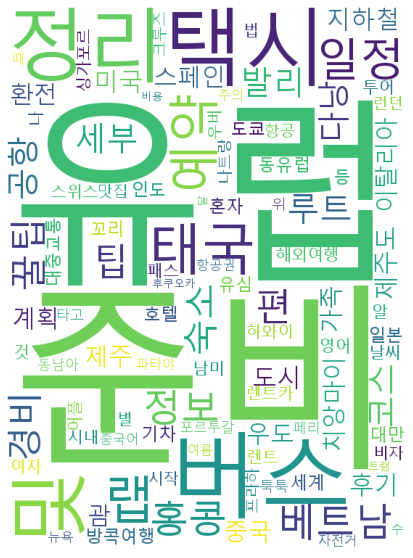

In [30]:
wordcloud=WordCloud(font_path = font_path,
                background_color="white",
                   max_words=100,
                   relative_scaling=0.3,
                   width = 550,
                   height = 750
                   ).generate_from_frequencies(token_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

In [29]:
cand_mask=np.array(Image.open('../data/여행이미지.png'))
cand_mask

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

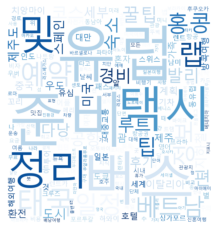

In [28]:
### colormap

# open the image and use np.array to transform the file to an array
cand_mask=np.array(Image.open('../data/여행이미지.png'))

# this line will take all values greater than 3 and make them 255 (white)
# if they are less than 3, they will be whatever value they are in the array
cand_mask=np.where(cand_mask > 3, 255, cand_mask)


#create and generate our wordcloud object
wordcloud = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      contour_color='red',
                      mask=cand_mask, 
                      colormap='Blues',
                      contour_width=4).generate_from_frequencies(token_counts_selected)


#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()